# Library

In [ ]:
#!pip install --upgrade tweepy==4.5.0
#!pip install --upgrade tweepy
#!pip install Sastrawi
#print(tweepy.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library & package. 
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, requests, re
import tweepy
import string
import nltk
import Sastrawi
import seaborn as sns
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from tweepy import Paginator
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# API twitter authentication

In [ ]:
with open("tokens.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

In [ ]:
api = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

Pada kesempatan ini saya ingin scraping tweet tentang Sambo


In [ ]:
query = "sambo -is:retweet lang:id"

response = tweepy.Paginator(api.search_recent_tweets,
                          query = query,
                          max_results=100
                          ).flatten(limit=300)
tweets = [tweet.text.strip() for tweet in response]
df = pd.DataFrame(tweets, columns=['tweet'])
df

,tweet
0,@NUgarislucu Masa Laluku\nEnola Band bth Produ...
1,@NarasiNewsroom ricky rizal dituntut 8 tahun.\...
2,Jaksa Sebut Ferdy Sambo yang Bersikukuh Membun...
3,Tuntutan JPU ini menuai beragam komentar dari ...
4,"Tv berita favorit saya, Kompastv, MetroTv, TvO..."
...,...
295,@sipalingdewasaa @asumsico Kalau takut ama fer...
296,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G..."
297,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G..."
298,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G..."


# Text Preprocessing

melakukan pembersihan data dari kata/karakter seperti @, link

In [ ]:
tweets = list(map(lambda x: x.lower(),tweets))
tweets = list(map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|(\d+)", " ", x).split()),tweets))
df['clean_tweet'] = tweets
df

,tweet,clean_tweet
0,@NUgarislucu Masa Laluku\nEnola Band bth Produ...,masa laluku enola band bth produser atau label...
1,@NarasiNewsroom ricky rizal dituntut 8 tahun.\...,ricky rizal dituntut tahun kuat maruf dituntut...
2,Jaksa Sebut Ferdy Sambo yang Bersikukuh Membun...,jaksa sebut ferdy sambo yang bersikukuh membun...
3,Tuntutan JPU ini menuai beragam komentar dari ...,tuntutan jpu ini menuai beragam komentar dari ...
4,"Tv berita favorit saya, Kompastv, MetroTv, TvO...",tv berita favorit saya kompastv metrotv tvone ...
...,...,...
295,@sipalingdewasaa @asumsico Kalau takut ama fer...,kalau takut ama ferdy sambo harusnya ya langsu...
296,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",sepuluh tahun menjabat gubernur jawa tengah ga...
297,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",sepuluh tahun menjabat gubernur jawa tengah ga...
298,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",sepuluh tahun menjabat gubernur jawa tengah ga...


Membuang slang word pada data

In [ ]:
def remove_slank_words(text):
    slankwords = stopwords.words('indonesian')
    slankwords.extend(['gwe','gw','gue','gua','lo','lu','kaya','kayak','ky','gak','gk','kaga','d','mulu','waw'])
    slankwords = set(slankwords)
    text_without_slankwords = [word for word in str(text).split() if word.lower() not in slankwords]
    return " ".join(text_without_slankwords)

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(remove_slank_words)
df

,tweet,clean_tweet
0,@NUgarislucu Masa Laluku\nEnola Band bth Produ...,laluku enola band bth produser label musik hub...
1,@NarasiNewsroom ricky rizal dituntut 8 tahun.\...,ricky rizal dituntut kuat maruf dituntut ferdy...
2,Jaksa Sebut Ferdy Sambo yang Bersikukuh Membun...,jaksa ferdy sambo bersikukuh membunuh brigadir j
3,Tuntutan JPU ini menuai beragam komentar dari ...,tuntutan jpu menuai beragam komentar netizen k...
4,"Tv berita favorit saya, Kompastv, MetroTv, TvO...",tv berita favorit kompastv metrotv tvone yg je...
...,...,...
295,@sipalingdewasaa @asumsico Kalau takut ama fer...,takut ama ferdy sambo ya langsung hukum mati a...
296,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",sepuluh menjabat gubernur jawa ganjar pranowo ...
297,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",sepuluh menjabat gubernur jawa ganjar pranowo ...
298,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",sepuluh menjabat gubernur jawa ganjar pranowo ...


In [ ]:
# re-check slang word
matched_rows = df[df['clean_tweet'].str.contains('gw')]
matched_rows

,tweet,clean_tweet


stemming data pada column clean_tweet

In [ ]:
def text_stemmer2(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  output = (stemmer.stem(text.lower()))
  return output

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(text_stemmer2)
df

,tweet,clean_tweet
0,@NUgarislucu Masa Laluku\nEnola Band bth Produ...,lalu enola band bth produser label musik hub a...
1,@NarasiNewsroom ricky rizal dituntut 8 tahun.\...,ricky rizal tuntut kuat maruf tuntut ferdy sam...
2,Jaksa Sebut Ferdy Sambo yang Bersikukuh Membun...,jaksa ferdy sambo bersikukuh bunuh brigadir j
3,Tuntutan JPU ini menuai beragam komentar dari ...,tuntut jpu tuai agam komentar netizen banyak w...
4,"Tv berita favorit saya, Kompastv, MetroTv, TvO...",tv berita favorit kompastv metrotv tvone yg je...
...,...,...
295,@sipalingdewasaa @asumsico Kalau takut ama fer...,takut ama ferdy sambo ya langsung hukum mati a...
296,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",puluh jabat gubernur jawa ganjar pranowo bantu...
297,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",puluh jabat gubernur jawa ganjar pranowo bantu...
298,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",puluh jabat gubernur jawa ganjar pranowo bantu...


# Text analysis

Melakukan text analysis berupa word_frequency, mean_word_length, dsb.

In [ ]:
#lakukan semua Text Analysis, seperti 
#tampilkan plot dari setiap analysis
#dengan melihat word_frequency coba perbaiki pembersihan slang word pada tweet_clean
#tampilkan dataframe kalian

Jumlah karakter pada column clean_tweet

Text(0, 0.5, 'Freq')

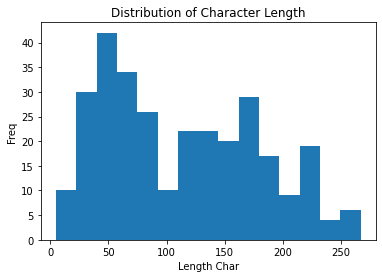

In [ ]:
length_char = df['clean_tweet'].str.len()
plt.hist(length_char, bins=15)
plt.title('Distribution of Character Length')
plt.xlabel('Length Char')
plt.ylabel('Freq')

Jumlah kata pada column clean_tweet

Text(0, 0.5, 'Freq')

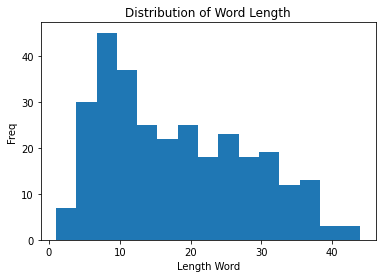

In [ ]:
#Distribusi panjang kata per tweet
length_word = df['clean_tweet'].str.split().map(lambda x: len(x))
plt.hist(length_word, bins=15)
plt.title('Distribution of Word Length')
plt.xlabel('Length Word')
plt.ylabel('Freq')

Rata-rata panjang kata pada column clean_tweet

Text(0, 0.5, 'Freq')

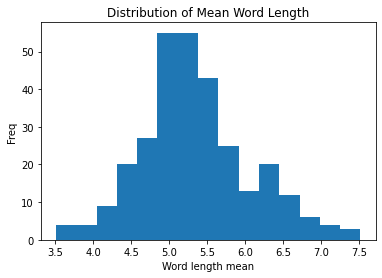

In [ ]:
word_length_mean =df['clean_tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
plt.hist(word_length_mean, bins=15)
plt.title('Distribution of Mean Word Length')
plt.xlabel('Word length mean')
plt.ylabel('Freq')

In [ ]:
fqdist = FreqDist(str(tweets).split())
most_common_word = fqdist.most_common(10)
most_common_word

[('sambo', 287),
 ('ferdy', 189),
 ('aun', 97),
 ('fir', 94),
 ('seumur', 94),
 ('cak', 82),
 ('nabi', 82),
 ('khidir', 82),
 ('nun', 71),
 ('hidup', 67)]

# Sentiment Analysis 

In [ ]:
with open("./kata_positif.txt","r") as positif_file :
  positive_words = list(set(positif_file.readlines()))
with open("./kata_negatif.txt","r") as negative_file :
  negative_words = list(set(negative_file.readlines()))


In [ ]:
hasil = []
#list_negasi = ['tidak','lawan','anti', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'tak']

for tweet in tweets:

    tweet_clean = tweet.strip().split()
    
    good_count = 0 #nilai positif
    bad_count = 0 #nilai negatif

    for good_word in positive_words:
        count = tweet_clean.count(good_word.strip().lower())
        if count > 0:
          print(good_word.strip())
          good_count += count

    for bad_word in negative_words:
        count = tweet_clean.count(bad_word.strip().lower())
        if count > 0:
          print(bad_word.strip())
          bad_count += count
    
    print ("positif: "+str(good_count))
    print ("negatif: "+str(bad_count))
    hasil.append(good_count - bad_count)
    print ("-----------------------------------------------------")

In [ ]:
print (f'''
Mean: {np.mean(hasil)}
Median: {np.median(hasil)}
quartil awal: {np.quantile(hasil,0.25)}
quartil tengah: {np.quantile(hasil,0.5)}
quartil akhir: {np.quantile(hasil,0.75)}
Standar deviasi: {np.std(hasil)}   
Max : {max(hasil)}
Min : {min(hasil)}  
''')


Mean: -0.09
Median: 0.0
quartil awal: -1.0
quartil tengah: 0.0
quartil akhir: 1.0
Standar deviasi: 1.7837881040078722   
Max : 6
Min : -6  



In [ ]:
sentiments = ["positif" if sentimen > 0 else ("netral" if sentimen == 0 else "negatif") for sentimen in hasil]
df["sentiment"] = sentiments
df['sentiment'].value_counts()
df

,tweet,clean_tweet,sentiment
0,@NUgarislucu Masa Laluku\nEnola Band bth Produ...,lalu enola band bth produser label musik hub a...,positif
1,@NarasiNewsroom ricky rizal dituntut 8 tahun.\...,ricky rizal tuntut kuat maruf tuntut ferdy sam...,negatif
2,Jaksa Sebut Ferdy Sambo yang Bersikukuh Membun...,jaksa ferdy sambo bersikukuh bunuh brigadir j,negatif
3,Tuntutan JPU ini menuai beragam komentar dari ...,tuntut jpu tuai agam komentar netizen banyak w...,negatif
4,"Tv berita favorit saya, Kompastv, MetroTv, TvO...",tv berita favorit kompastv metrotv tvone yg je...,netral
...,...,...,...
295,@sipalingdewasaa @asumsico Kalau takut ama fer...,takut ama ferdy sambo ya langsung hukum mati a...,negatif
296,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",puluh jabat gubernur jawa ganjar pranowo bantu...,positif
297,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",puluh jabat gubernur jawa ganjar pranowo bantu...,positif
298,"Sepuluh tahun menjabat, Gubernur Jawa Tengah G...",puluh jabat gubernur jawa ganjar pranowo bantu...,positif


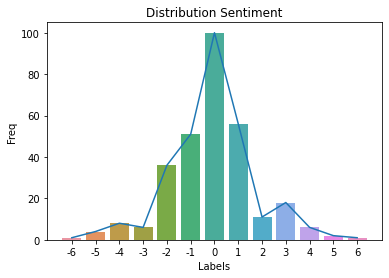

In [ ]:
labels, counts = np.unique(hasil, return_counts=True)

fig, ax = plt.subplots()
ax.set_xticks(ax.get_xticks())

sns.barplot(x = list(labels), 
            y = list(counts))

sns.lineplot(x = ax.get_xticks(), 
            y = list(counts))

plt.title(f'Distribution Sentiment')
plt.xlabel('Labels')
plt.ylabel('Freq')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Freq')

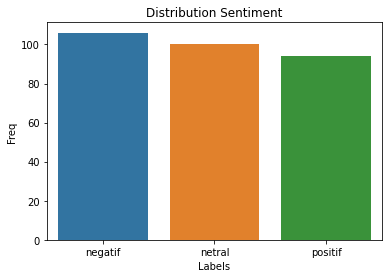

In [ ]:
sns.barplot(df['sentiment'].value_counts().index,df['sentiment'].value_counts())
plt.title(f'Distribution Sentiment')
plt.xlabel('Labels')
plt.ylabel('Freq')

In [ ]:
df['sentiment'].value_counts()

negatif    106
netral     100
positif     94
Name: sentiment, dtype: int64

In [ ]:
#lakukan analisis dan tarik kesimpulan dari Text analysis dan Sentiment Analysis
#masukkan analisis kalian pada sel berikut.
'''
Dari hasil text analisis dari tweet scrapping dapat dilihat 300 tweet membahas tentang ferdy sambo serta hukuman seumur hidup 

serta dari hasil setimen analisis pada tweet tentang sambo dapat dilihat sentimen negatif lebih banyak daripada sentimen netral dan positif
'''